# In Simple Steps: Classification Tree for Beginners

* This is a Classification Tree project on a dataset for heart disease prediction. I got this dataset from UC Irvine Machine Learning Repository.  
* UCI link for this dataset: "https://archive.ics.uci.edu/ml/datasets/Heart+Disease"  
* The goal of this project is to build a Classification Tree model that can predict the probability of a patient having heart disease or not from the features in this dataset.

**Credits to the creators of this dataset**

## Exploratory Data Analysis  
This is the first step in any Data Science or Machine Learning project. This step helps us underatand the data because in this step, we can explore and visualize our data, we analyze it using statistics

### 1. Importing the Libraries

In [1]:
import pandas as pd # for data preprocessing
import numpy as np # for Math and Linear Algebra
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tqdm import tqdm # Progress bar

import warnings # this will ignore the warnings and won't showup in the code cell output
warnings.filterwarnings('ignore')

# to view graphs in jupyter notebook 
%matplotlib inline

**Setting display options**  
This is an optional step.

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100
pd.options.display.precision = 5
pd.options.display.float_format = '{:.3f}'.format
sns.set_style("whitegrid") # seaborn plot styles: {darkgrid, whitegrid, dark, white, ticks}

## Step 1 - Importing data

In [3]:
df = pd.read_csv('processed.cleveland.data.csv', header = None)

# This datafile file can also be imported directly from the UCI portal thru the following 2 lines of code.
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
# df = pd.read_csv(url, header = None)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.300,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.500,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.600,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.500,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.400,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.200,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.400,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.200,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.000,2,1,3,1


The dataset does not have column names so the above dataframe gives column numbers instead. Replacing the column numbers with column names would make it easier to uderstand the dataframe and so wasier to work with it. I collected the following attribite info from the dataset web page and will use the attribute names (with minor changes) as the column names.

**Attribute Information:**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num (the predicted attribute): diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing

In [4]:
df.columns = ["age","sex","cp","restbp","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","hd"]

**Previewing Data**

In [5]:
df.head(3)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.300,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.500,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.600,2,2,7,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbp   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [7]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.439,0.680,3.158,131.690,246.693,0.149,0.990,149.607,0.327,1.040,1.601,0.937
std,9.039,0.467,0.960,17.600,51.777,0.356,0.995,22.875,0.470,1.161,0.616,1.229
min,29.000,0.000,1.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,1.000,0.000
25%,48.000,0.000,3.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000
50%,56.000,1.000,3.000,130.000,241.000,0.000,1.000,153.000,0.000,0.800,2.000,0.000
75%,61.000,1.000,4.000,140.000,275.000,0.000,2.000,166.000,1.000,1.600,2.000,2.000
max,77.000,1.000,4.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,3.000,4.000


In [8]:
df_int_col = df.select_dtypes(include = 'int64').columns.to_list()

In [9]:
df[df_int_col] = df[df_int_col].astype('int16')
df["oldpeak"] = df["oldpeak"].astype('float16')

**Checking for duplicate rows**

Detect Outliers

High-level Statistics

distribution of Numerical data

count distribution of Categorical data

Univariate, Bivariate, and Multivariate EDA

Correlation Matrix between independent features and dependent feature

## Step 2 - Missing data

**A: Identifying missing data**

In [10]:
# Checking data types and null values in each column using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int16  
 1   sex      303 non-null    int16  
 2   cp       303 non-null    int16  
 3   restbp   303 non-null    int16  
 4   chol     303 non-null    int16  
 5   fbs      303 non-null    int16  
 6   restecg  303 non-null    int16  
 7   thalach  303 non-null    int16  
 8   exang    303 non-null    int16  
 9   oldpeak  303 non-null    float16
 10  slope    303 non-null    int16  
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int16  
dtypes: float16(1), int16(11), object(2)
memory usage: 12.0+ KB


The dataset doesn't have any null values but 'ca' and 'thal' columns are 'object' type and need more investigation.

In [11]:
# Checking unique values in 'ca'
df['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

'ca' column has '0, 1, 2, 3 and 0' values where '0, 1, 2, 3' represents number of blood vessels and '?' represents missing data.

In [12]:
# Checking unique values in 'thal'
df['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

'thal' column also has numbers and '?' representing missing data.

**B: Dealing with missing data**  
Scikit-learn Classification Trees do not support datasets with missing values so we will have to take care of all the missing values. There are two options for us,  
-- delete all the rows with missing data if the # of rows to be deleted are very few compared to the total # of rows  
-- impute values for the missing data, if the # of rows to be deleted are large compared to the total # of rows

In [13]:
# Finding out total # of rows with missing data
df[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53,0,3,128,216,0,2,115,0,0.000,1,0,?,0
166,52,1,3,138,223,0,0,169,0,0.000,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.100,2,?,7,1
266,52,1,4,128,204,1,0,156,1,1.000,2,0,?,2
287,58,1,2,125,220,0,0,144,0,0.400,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.000,1,?,3,0


In [14]:
# If there are many rows, we can count the # of rows with the following line of code
len(df[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [15]:
# Counting # of rows in the dataset
len(df)

303

So 6 out of 303 rows have missing values. This is about 2% of the data which is a very small # and so we can delete these rows from our dataframe.

In [16]:
# Dataset without the missing values
df_no_miss = df[(df['ca'] != '?') & (df['thal'] != '?')]
len(df_no_miss)

297

So we now have 297 rows of data in our dataset that we can use in building our Classification Tree model.

## Step 3 - Formatting the data for Decision Trees

We will format the data to make a **Classification Tree**.  

**Format the data part 1: Split the data into two parts:**  
  
  1. Columns of data that we will use to make our Classification Tree. We will denote with '**X**'.
  2. Column of data that we want to predict. We want to predict **hd** (heart disease). We will denote it with '**y**'.

In [17]:
# independent variables to build our tree / to make predictions
X = df_no_miss.drop(columns = 'hd' )

In [18]:
X.head(3)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.301,3,0,6
1,67,1,4,160,286,0,2,108,1,1.500,2,3,3
2,67,1,4,120,229,0,2,129,1,2.600,2,2,7


In [19]:
# dependnet or target variable that we want to predict
y = df_no_miss['hd']

In [20]:
y.head(3)

0    0
1    2
2    1
Name: hd, dtype: int16

**Format the data part 2: One-Hot Encoding**  

As we have now started working on our Tree, we should take a look at the parameters in X & y.

*X: Check each variable in X for their actuall data types and what they should be for our model building.*  

1. age: age in years (*It is `int` and should be `int`.*)  
2. sex: sex (*It is `int` but should be `categorical`.*)  
    - 0 = female  
    - 1 = male  
3. cp: chest pain type (*It is `int` but should be `categorical`.*)  
    - 1: typical angina  
    - 2: atypical angina  
    - 3: non-anginal pain  
    - 4: asymptomatic   
4. restbp: resting blood pressure (in mm Hg on admission to the hospital) (*It is `int` and should be `int`.*)      
5. chol: serum cholestoral in mg/dl (*It is `int` and should be `int`.*)  
    
6. fbs: fasting blood sugar (*It is `int` but should be `categorical`.*)  
    - 0 = false (>= 120 mg/dl)  
    - 1 = true (< 120 mg/dl)  
7. restecg: resting electrocardiographic results (*It is `int` but should be `categorical`.*)  
    - 0: normal  
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
8. thalach: maximum heart rate achieved (*It is `int` and should be `int`.*)  
9. exang: exercise induced angina (*It is `int` but should be `categorical`.*)  
    - 0 = no    
    - 1 = yes  
10. oldpeak: ST depression induced by exercise relative to rest (*It is `float` and should be `float`.*)  
11. slope: the slope of the peak exercise ST segment (*It is `int` but should be `categorical`.*)  
    - 1: upsloping  
    - 2: flat  
    - 3: downsloping  
12. ca: number of major vessels (0-3) colored by flourosopy (*It is `object` but should be `categorical`.*)  
    - 0  
    - 1  
    - 2  
    - 3  
13. thal: (*It is `object` but should be `categorical`.*)  
    - 3 = normal  
    - 6 = fixed defect  
    - 7 = reversable defect  

Scikit-learn Decision Trees natively support continuous data, they do not support categorical data. So to use categorical data with Scikit-learn Decision Trees, we have to convert each categorical column into multipal columns of binary values using *One-Hot Encoding* method. There are different ways to do *One-Hot Encoding*, I will use `get_dummies()` function from Pandas.

In [21]:
# I am using get_dummies() function on the four categorical variables that have more than 2 categories.
X_encoded = pd.get_dummies(X, columns = ['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7
0,63,1,145,233,1,150,0,2.301,0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67,1,160,286,0,108,1,1.500,3,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67,1,120,229,0,129,1,2.600,2,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.500,0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41,0,130,204,0,172,0,1.400,0,0,1,0,0,0,0,1,1,0,0,1,0,0


A point is to be noted here that any categorical variable with 2 categories (values = 0 and 1), there may be missing values or values other than 0 and 1 such as '?', 'na', etc... This should be verified using Pandas `unique()` function which would give unique values in each column.

*y: Check the variable in y for its actuall data type and what it should be for our model building.*  

14. num (the predicted attribute): diagnosis of heart disease (angiographic disease status) (*It is `int` but should be `categorical`.*)  
    - 0 = < 50% diameter narrowing  
    - 1 = > 50% diameter narrowing  

In [22]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int16)

`y` has 5 different values for differelt levels of heart disease where *0 is for no heart disease* and *1 ~ 4 is for various level of heart disease*. In this project I am building a simple tree to classify if a patient has heart disease or not. So I will convert all numbers to 0 and 1 where *0 being no heart disease* and *1 ~ 4 for presence of heart disease*.

In [23]:
y_234_index = y > 1 # index for 2, 3, 4 values in y
y[y_234_index] = 1 # change values of 2, 3, 4 in y to 1
y.unique()

array([0, 1], dtype=int16)

**We now have finished formatting our data to make a Classification Tree so we can start building our Tree**

## Build a Preliminary Classification Tree  
**We will build a Classification Tree that is not optimized.**

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size = 0.75, random_state = 10)

# Create a Decision Tree
clf_dt = DecisionTreeClassifier(random_state = 10)

# Fit the Decision Tree to the training data
clf_dt = clf_dt.fit(X_train, y_train)

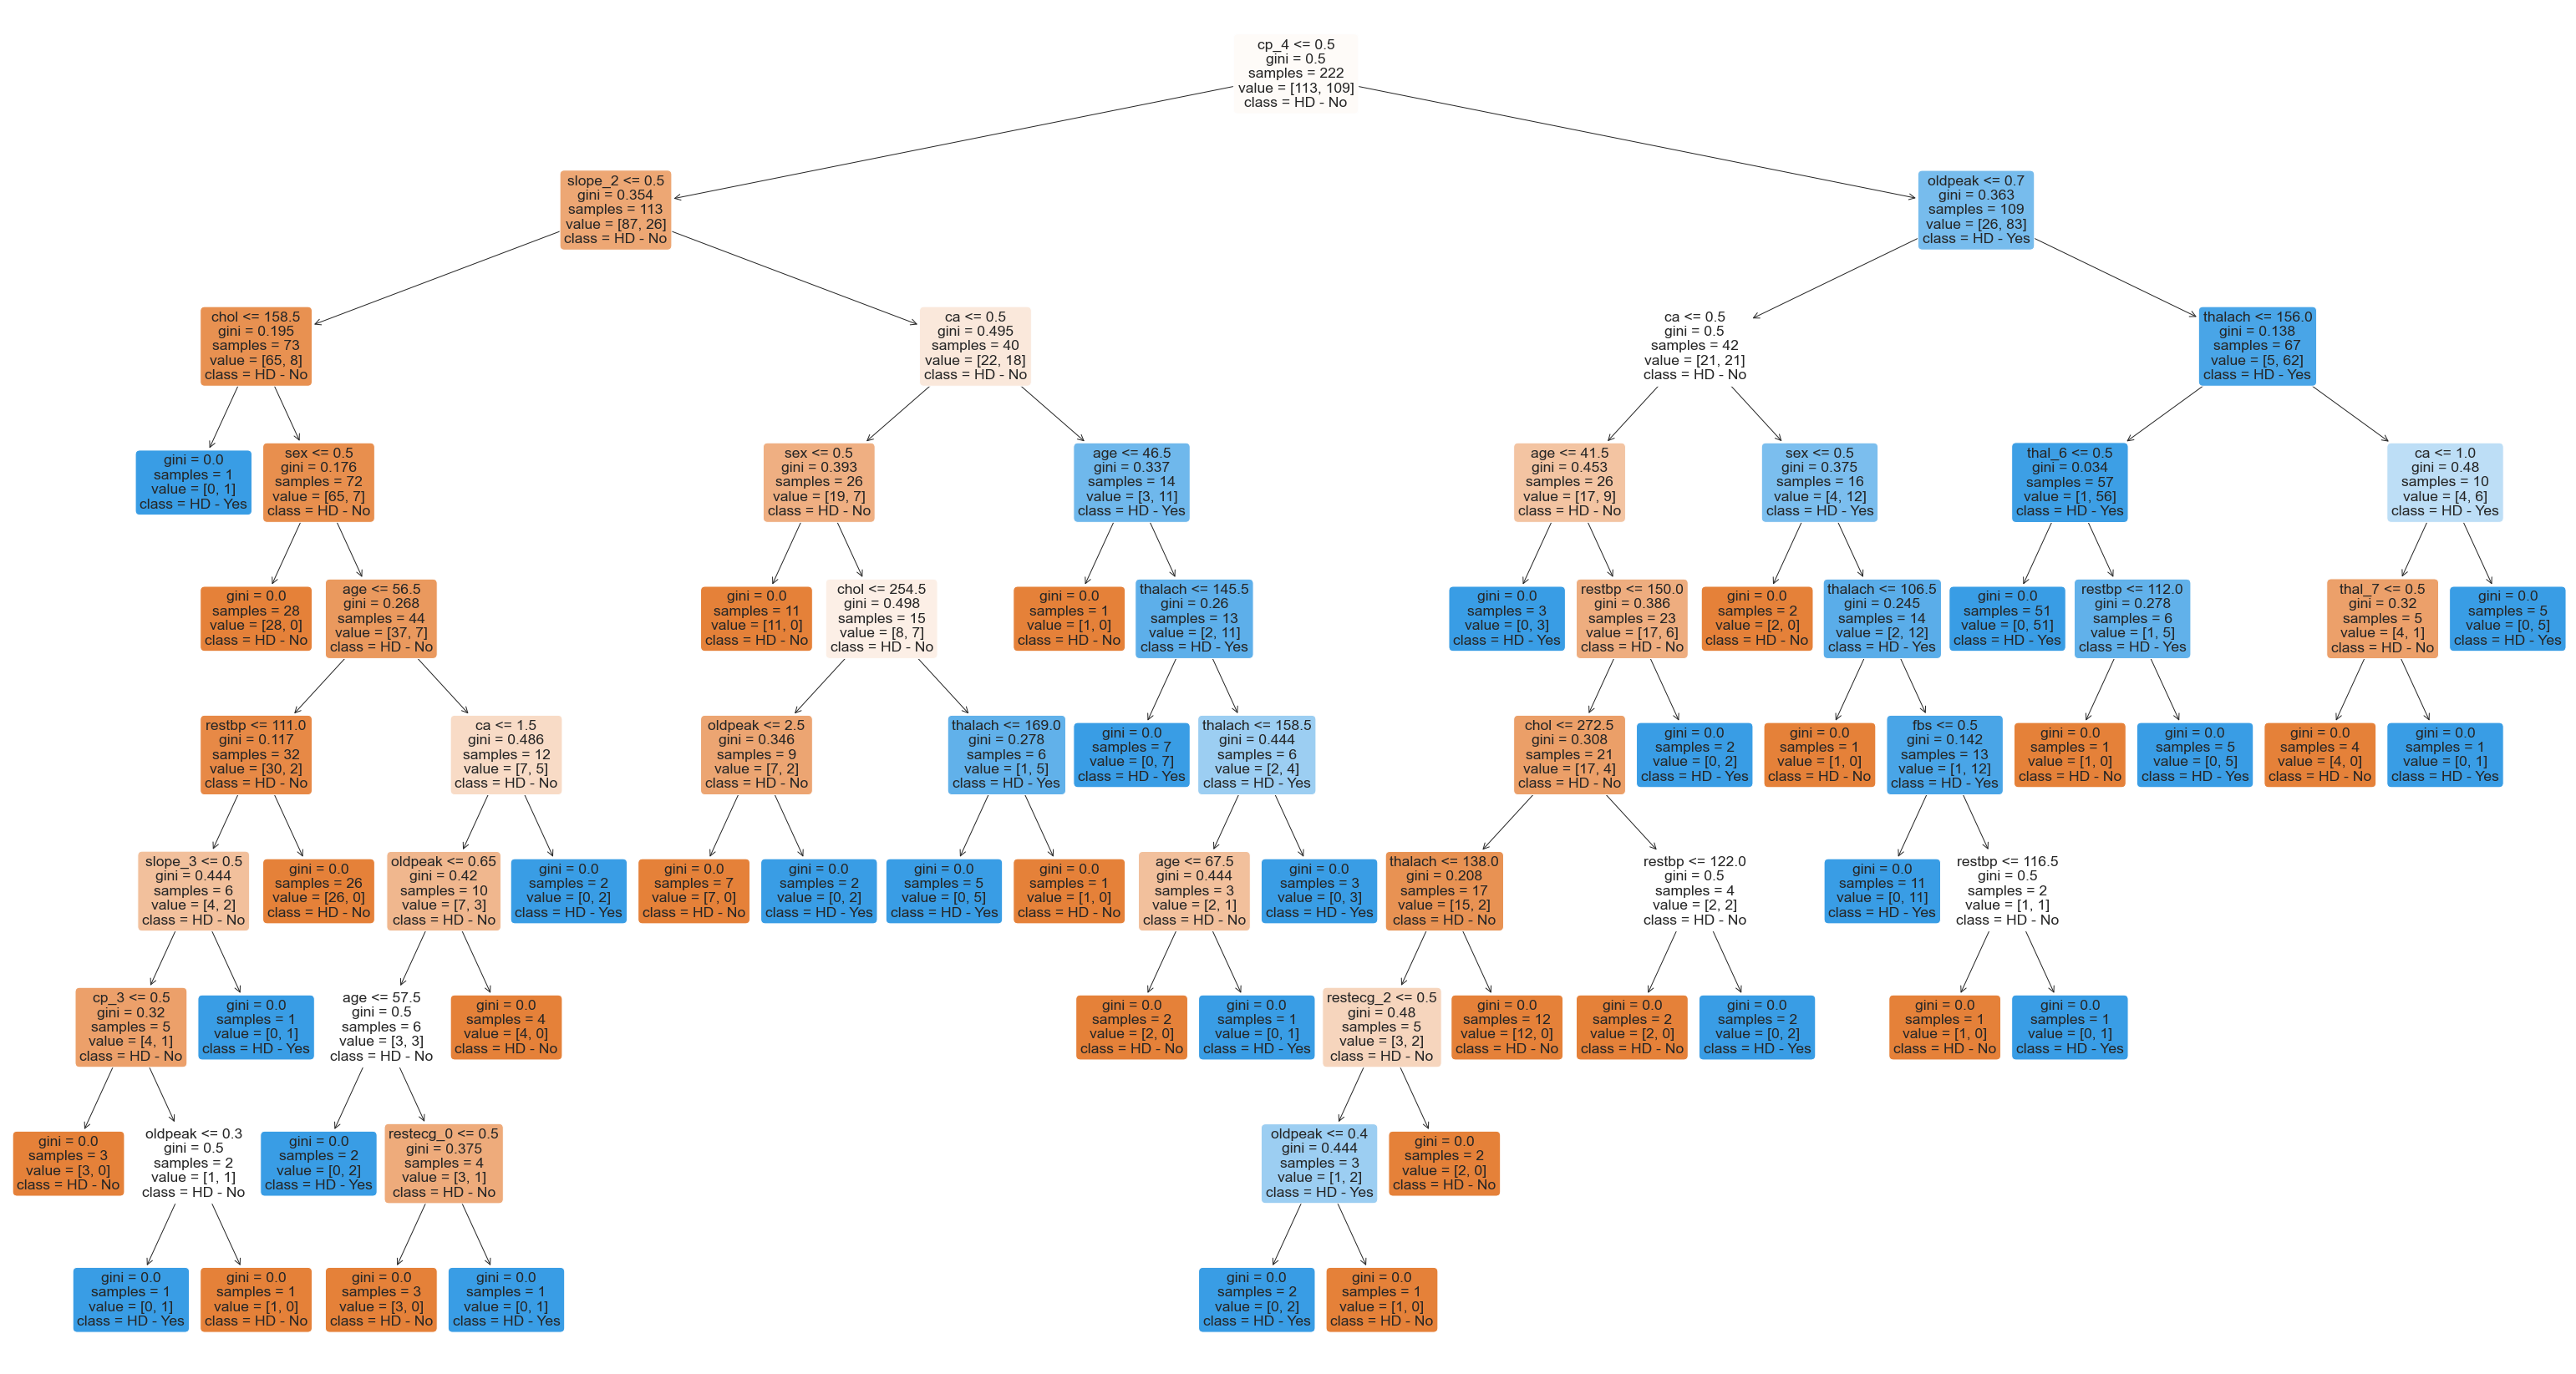

In [37]:
# Plot the Tree
plt.figure(figsize = (55, 30))
plot_tree(clf_dt, filled = True, rounded = True, class_names = ['HD - No','HD - Yes'],
          feature_names = X_encoded.columns)
plt.show()

We ae now checking how our newly created Classification Tree performs on the *Testing Dataset*. The following line of code will plot the *Confusion Matrix* with the Classification Tree and Test Data

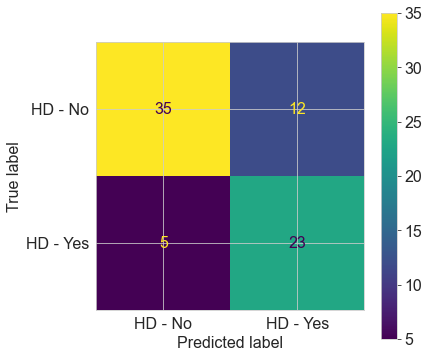

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ["HD - No","HD - Yes"], cmap = 'viridis', ax = ax)
plt.show()

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
https://stackoverflow.com/questions/59839782/confusion-matrix-font-size

- In the above confusion matrix:  
    - *35 + 12 = 47* patients did not have Heart Disease and *35 (74.46%) were correctly classified*  
    - *5 + 23 = 28* patients did have Heart Disease and *23 (82.14%) were correctly classified*  
- We can improve the preformance of the tree because it may have *overfit* the training data. We can solve the overfitting problem by a technique called prunning. After pruning the tree, we may get a better result.

In [27]:
df_ = pd.read_csv('processed.cleveland.data.csv', header = None)
df_.columns = ["age","sex","cp","restbp","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","hd"]
df_.head(90)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.300,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.500,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.600,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.500,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.400,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,44,1,3,140,235,0,2,180,0,0.000,1,0,3,0
86,47,1,3,138,257,0,2,156,0,0.000,1,0,3,0
87,53,0,3,128,216,0,2,115,0,0.000,1,0,?,0
88,53,0,4,138,234,0,2,160,0,0.000,1,0,3,0


## Step 4